### Data Load and EDA

In [357]:
import pandas as pd  # Import pandas for data manipulation

# Load the dataset with proper encoding
df = pd.read_csv('spam.csv', encoding='latin1')

# Display the first 5 rows of the dataset
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [358]:
# Display summary statistics of the dataset
df.describe()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [359]:
#Rename the columns 
df.rename(columns={'v1': 'Category', 'v2': 'Message'}, inplace=True)

In [360]:
# Count the occurrences of each category
# This shows how many messages are labeled as 'spam' and 'ham'
category_counts = df['Category'].value_counts()
print(category_counts)

Category
ham     4825
spam     747
Name: count, dtype: int64


In [361]:
# Step 1: Count duplicate rows in the DataFrame
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows before removal: {duplicate_count}")

# Step 2: Drop duplicate rows (doesn't modify the DataFrame by default)
df_cleaned = df.drop_duplicates()

# Step 3: Recount duplicate rows in the cleaned DataFrame
duplicate_count_after = df_cleaned.duplicated().sum()
print(f"Number of duplicate rows after removal: {duplicate_count_after}")

# Optional: Modify the original DataFrame in place
# df.drop_duplicates(inplace=True)


Number of duplicate rows before removal: 403
Number of duplicate rows after removal: 0


In [362]:
# Define the feature variable (X)
# 'Category' is the label column, so it's used to classify messages
X = df['Category']

# Define the target variable (y)
# 'Message' is the text data that we aim to analyze or classify
y = df['Message']


### Train Test Split

In [363]:
# Import the train_test_split function from sklearn
from sklearn.model_selection import train_test_split

 # Split the dataset into training and testing sets
# df.Message: The text data (features) used for analysis/prediction
# df.Category: The labels (target) to classify, e.g., 'spam' or 'ham'
X_train, X_test, y_train, y_test = train_test_split(df.Message, df.Category, test_size=0.2, shuffle=True, random_state=2)

# Output variables:
# X_train, y_train: Training data for the model
# X_test, y_test: Testing data for evaluating model performance


In [364]:
X_train[2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

### Feature Engineering: Convert Text into Vector

In [365]:
# Import CountVectorizer from sklearn
# CountVectorizer converts text data into a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
# This will tokenize the text and count the frequency of each word
v = CountVectorizer()

# Fit the CountVectorizer on the training data and transform it into a sparse matrix
# X_train.values: The text data from the training set
# v.fit_transform() learns the vocabulary and converts the text into numeric feature vectors
X_train_count = v.fit_transform(X_train.values)

# Transform the test data into numeric feature vectors
# Note: The test data is only transformed using the vocabulary learned from the training data
X_test_count = v.transform(X_test.values)

# Convert the sparse matrix of the training data to a dense array and display the first two rows
# toarray(): Converts the sparse representation to a dense (NumPy) array
X_train_count.toarray()[:2]


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [366]:
len(X_train_count.toarray()[1])

7628

### Train a Model Using Naive Bayes

In [367]:
# Import the Multinomial Naive Bayes model from sklearn
# This algorithm is commonly used for text classification tasks like spam detection
from sklearn.naive_bayes import MultinomialNB

# Initialize the MultinomialNB model
# Multinomial Naive Bayes assumes that features follow a multinomial distribution
model = MultinomialNB()

# Train the model on the training data
# model.fit() learns the relationship between the feature matrix (X_train_count) and labels (y_train)
# X_train_count: The count-based feature vectors generated by CountVectorizer
# y_train: The corresponding labels ('spam' or 'ham')
model.fit(X_train_count, y_train)


MultinomialNB()

### Model Evaluation: Precision, Recall and F1-Score

In [368]:
# Import the classification_report function from sklearn
# This function generates a detailed report showing the main classification metrics
from sklearn.metrics import classification_report

# Predict the labels for the test dataset
# The model uses the learned patterns from the training data to classify the test data
y_pred = model.predict(X_test_count)

# Generate a classification report
# This report includes precision, recall, F1-score, and support for each class
report = classification_report(y_test, y_pred)

# Print the classification report to evaluate the model's performance
print(report)


              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       957
        spam       0.98      0.88      0.93       158

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



### Model Evaluation: Confusion Matrix

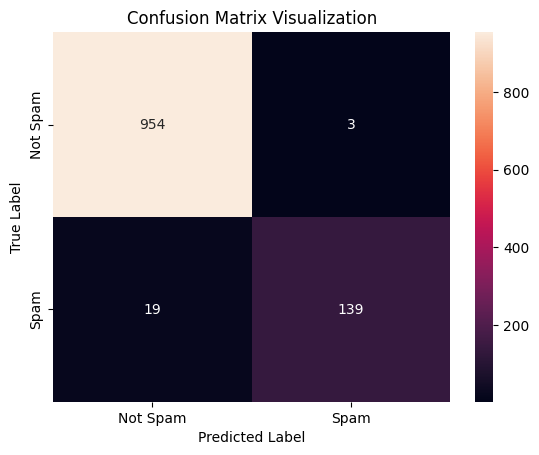

In [369]:
# Import the confusion_matrix function from sklearn
# The confusion_matrix function evaluates classification performance by comparing predicted and true labels
from sklearn.metrics import confusion_matrix

import seaborn as sns
from matplotlib import pyplot as plt

# Generate the confusion matrix
# cm will be a 2x2 matrix comparing the true labels (y_test) with the predicted labels (y_pred)
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
# annot=True: Annotates the matrix with the numerical values
# fmt="d": Ensures the values are displayed as integers
# xticklabels and yticklabels: Label the axes with class names ('Not Spam' and 'Spam')
sns.heatmap(cm, annot=True, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Visualization')
plt.show()

Matrix Breakdown:

True Negative (Not Spam predicted as Not Spam): 954 -- 
Your model correctly identified 954 messages as "Not Spam."

False Positive (Not Spam predicted as Spam): 19  -- 
Only 19 "Not Spam" messages were incorrectly classified as "Spam."

False Negative (Spam predicted as Not Spam): 3 -- 
3 "Spam" messages were missed and incorrectly classified as "Not Spam."

True Positive (Spam predicted as Spam): 139 --
139 "Spam" messages were correctly identified as "Spam."

### Prediction on Sample Emails

In [370]:
emails = [
    'Hey bro, can we go together to watch IPL match tomorrow?',
    'i LOVE YOU FREE fREE free ',
    'Chal daru laa fir',
    'Get free sunglasses now!',
    'Hey Manish, I got free tickets for the match by my uncle',
    "I'm sorry, I'll be late for the meeting",
    'Get free free money now!',
    'Get free money now!'
    'Hurry we need to go to the meeting',
    'Hurry we need to go for free lunch'
]
emails_count = v.transform(emails)
model.predict(emails_count)

array(['ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham'],
      dtype='<U4')

### Now do same thing using Sklearn Pipeline with Few Lines of Code

In [371]:
# from sklearn.pipeline import Pipeline
# pipe = Pipeline([
#     ('vectorizer', CountVectorizer()),
#     ('nb', MultinomialNB())
# ])

# pipe.fit(X_train, y_train)

# y_pred = pipe.predict(X_test)
# report = classification_report(y_test, y_pred)
# print(report)

In [372]:
# pipe.predict(emails)